In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


PROBLEM 1

In [3]:
allsky_sample=np.genfromtxt('allsky_sample.csv',names=True, delimiter=',')

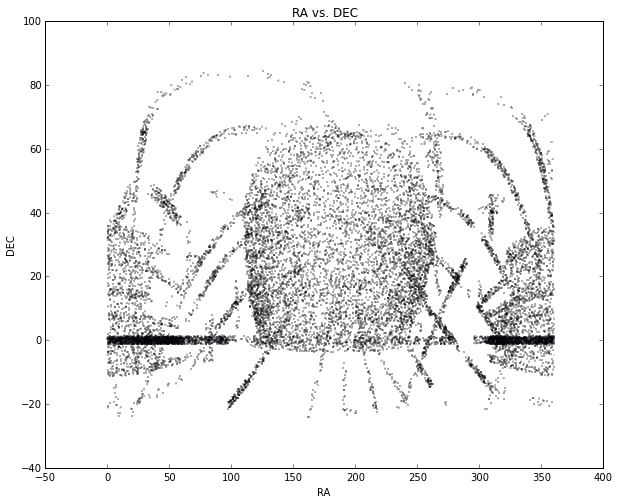

In [4]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('RA vs. DEC')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.scatter(allsky_sample["ra"],allsky_sample["dec"], marker='.',s=0.1)
plt.show()

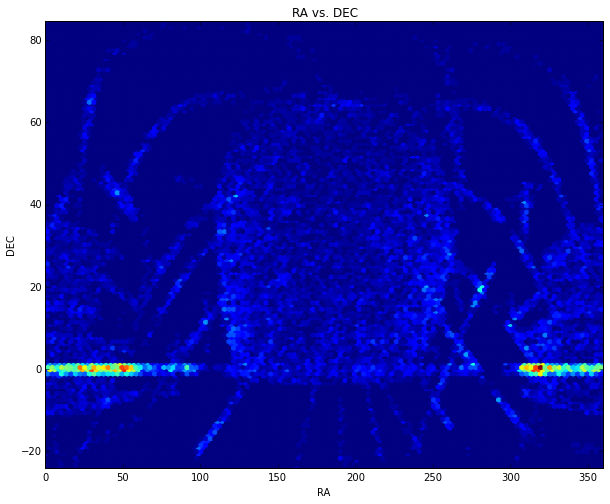

In [5]:
grds=360/3
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('RA vs. DEC')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.hexbin(allsky_sample["ra"],allsky_sample["dec"],gridsize=grds,cmap=plt.cm.jet)
plt.show()

PROBLEM 2

In [6]:
def equgal(ra,dec):
    
    b=np.arcsin(np.sin(dec*(np.pi/180))*np.cos(62.6*(np.pi/180))\
                -np.cos(dec*(np.pi/180))*np.sin((ra-282.25)*(np.pi/180))*np.sin(62.6*np.pi/180))
    
    l=np.arccos(np.cos(dec*(np.pi/180))*np.cos((ra-282.25)*np.pi/180)/np.cos(b))+33.0*np.pi/180
    return l*180/np.pi,b*180/np.pi
    

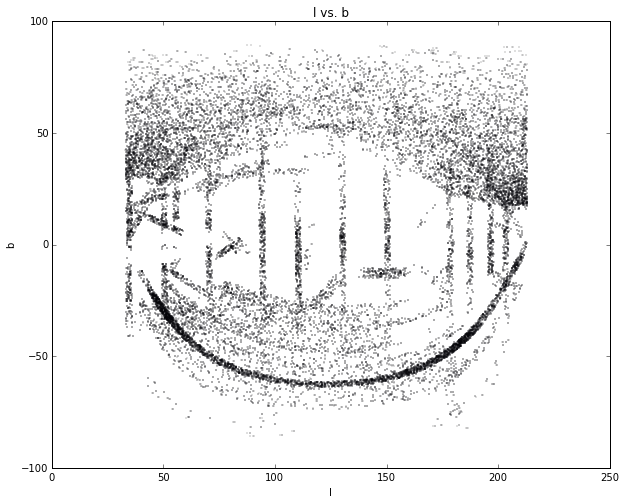

In [7]:
l,b=equgal(allsky_sample["ra"],allsky_sample["dec"])
           
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('l vs. b')
ax.set_xlabel('l')
ax.set_ylabel('b')
ax.scatter(l,b, marker='.',s=0.1)
plt.show()

In [8]:
mask=np.argsort(abs(b))[:5]
print "RA=",allsky_sample["ra"][mask]
print "DEC=",allsky_sample["dec"][mask]

RA= [  30.32108368   30.31963128   25.49209167  307.86959285   30.32164964]
DEC= [ 61.41147037  61.41278392  61.95064133  39.80978861  61.41433807]


PROBLEM 3

In [9]:
small_sdss=np.genfromtxt('small_sdss.csv',names=True,delimiter=',')

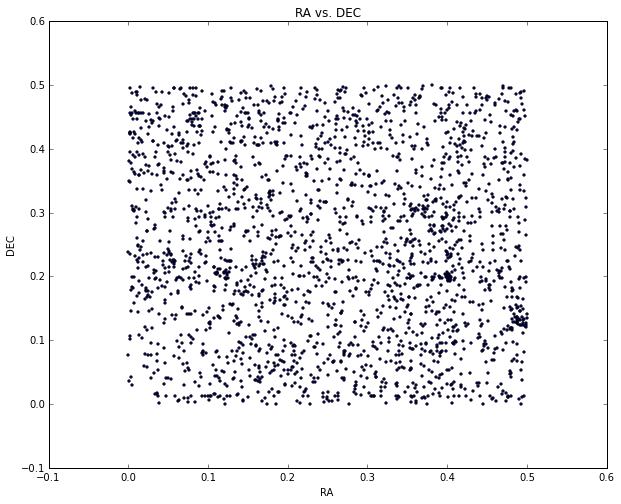

In [10]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('RA vs. DEC')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.scatter(small_sdss["ra"],small_sdss["dec"], marker='.')
plt.show()

In [11]:
def gc_dist(ra, dec):
    #creating a 3d array to pair ra and dec values, with degrees to radians conversion
    ra_tile=np.tile(np.deg2rad(ra),(len(ra),1)) 
    dec_tile=np.tile(np.deg2rad(dec),(len(dec),1))
    ra_stack = np.dstack((ra_tile,ra_tile.T))
    dec_stack = np.dstack((dec_tile,dec_tile.T))
    #mask which selects the upper triangle excluding the diagonal producing an array of pairs
    mask=np.triu_indices(np.shape(ra_stack)[0],k=1)
    #assign variables from masked ra and dec stacks
    lat1=ra_stack[mask][:,0]
    lat2=ra_stack[mask][:,1]
    lon1=dec_stack[mask][:,0]
    lon2=dec_stack[mask][:,1]
    #Great-circle angular distance equation
    numerator=np.sqrt((np.cos(lat2)*np.sin(abs(lon2-lon1))**2+(np.cos(lat1)*np.sin(lat2)-\
                np.cos(lat2)*np.sin(lat1)*np.cos(abs(lon2-lon1)))**2.0))
    denominator=(np.sin(lat1)*np.sin(lat2)+np.cos(lat1)*np.cos(lat2)*np.cos(abs(lon2-lon1)))
    #Using arctan2 for proper sign of output.
    dist=np.arctan2(numerator,denominator)
    return np.rad2deg(dist)

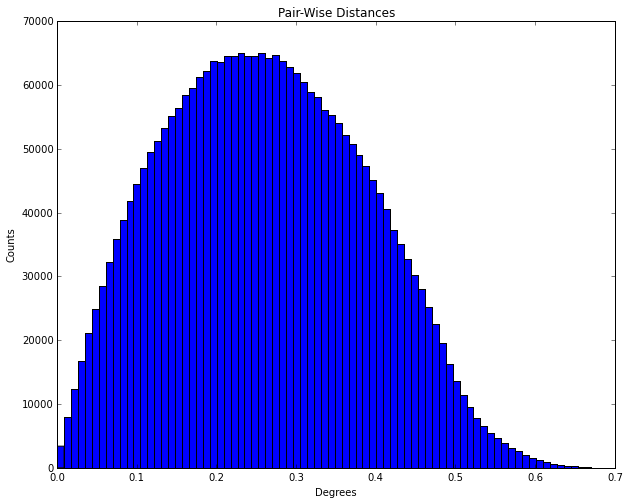

In [12]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('Pair-Wise Distances')
ax.set_xlabel('Degrees')
ax.set_ylabel('Counts')
ax.hist(gc_dist(small_sdss["ra"],small_sdss["dec"]),bins=80)
plt.show()

In [13]:
%timeit gc_dist(small_sdss["ra"],small_sdss["dec"])

1 loops, best of 3: 950 ms per loop


In [14]:
print gc_dist(small_sdss["ra"],small_sdss["dec"]).size

2690040


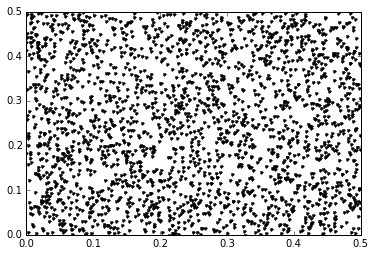

In [15]:
#creating a random distribution of ra and dec values in range of 0.0 to 0.5
ra_rand=np.random.rand(len(small_sdss["ra"]))*0.5
dec_rand=np.random.rand(len(small_sdss["ra"]))*0.5
plt.plot(ra_rand,dec_rand,'k.')
plt.show()

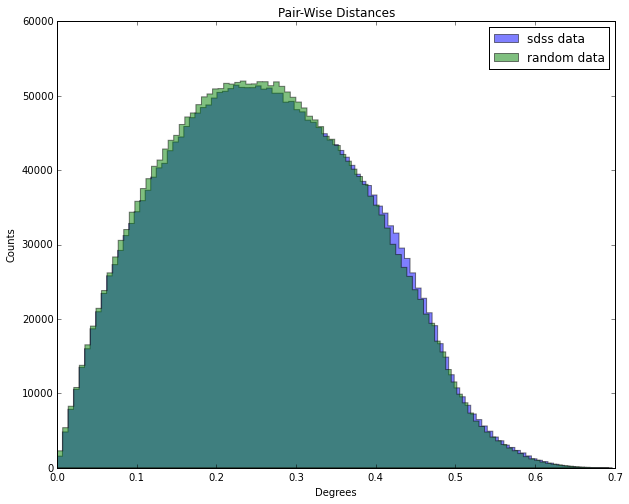

In [16]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_title('Pair-Wise Distances')
ax.set_xlabel('Degrees')
ax.set_ylabel('Counts')
ax.hist(gc_dist(ra_rand,dec_rand),bins=100,histtype='stepfilled',color='b',alpha=0.5,label='sdss data')
ax.hist(gc_dist(small_sdss["ra"],small_sdss["dec"]),bins=100,histtype='stepfilled',color='g',alpha=0.5,label='random data')
plt.legend()
plt.show()

In [17]:
#We see that both the SDSS data set and a random sample data set are both very similar to the Poisson distribution. 